In [ ]:
!pip install darts -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score, mae, rmse
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
from darts.models import NBEATSModel
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
import darts.utils.timeseries_generation as tg
from darts.datasets import AirPassengersDataset, EnergyDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import GaussianLikelihood

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('<path_to_drive>')

In [ ]:
df.isna().sum()

Adv link                           0
Data Vendita                       0
Offerta MIn (Euro)                 0
Rialzo Min (Euro)                  0
ID Procedura                       0
Prezzo asta (Euro)                 0
Pdfs links                         0
Indirizzo                          0
Location                           0
Prezzo di mercato min/mq (Euro)    0
Prezzo di mercato max/mq (Euro)    0
Ref prezzo location link           0
Date_adv                           0
Tipologia                          0
Superficie                         0
mean_price_at_mq (Euro)            0
Mq_stimati                         0
dtype: int64

In [ ]:
df2 = df.copy()
df2 = df2[['Data Vendita','Offerta MIn (Euro)','Rialzo Min (Euro)','ID Procedura','Prezzo asta (Euro)','Indirizzo','Location','Date_adv','Tipologia','mean_price_at_mq (Euro)']]
df2

,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Indirizzo,Location,Date_adv,Tipologia,mean_price_at_mq (Euro)
0,2018-05-08,61800.00,1500.0,613/2014,82400.00,VIA FILIPPO ARGELATI NR. 44 - 20143 Milano (MI),Milano(MI),2018-03-16,"Negozi, botteghe",2425.34
1,2019-01-07,13125.00,500.0,835/2018,17500.00,"Via Fratelli Cairoli , 6 e 8 - 45100 Rovigo (RO)",Rovigo(RO),2018-11-07,"Negozi, botteghe",612.00
2,2019-01-08,103830.28,2078.0,205/2015,138440.38,Via M. Storelli n.32-34-36 - 76011 Bisceglie (BT),Bisceglie(BT),2018-11-07,"Negozi, botteghe",933.86
3,2019-01-10,209625.00,10000.0,3559/1999,279500.00,"C.so Umberto I, 395 - 65015 Montesilvano (PE)",Montesilvano(PE),2018-11-07,Negozio,533.80
4,2018-12-18,110000.00,10000.0,20/2017,110000.00,"Via Rigola, 27 Verbania (VB)",Verbania(VB),2018-11-07,Negozio,170.00
...,...,...,...,...,...,...,...,...,...,...
7168,2018-12-18,36960.00,5000.0,30/2014,36960.00,Via Renzo Boccardi - 28921 Verbania (VB),Verbania(VB),2018-11-05,Negozio,170.00
7169,2019-01-07,141738.00,1300.0,20/2005,188984.00,"via Montegrappa, - 89024 Polistena (RC)",Polistena(RC),2018-11-05,"Negozi, botteghe",353.60
7170,2018-05-08,79200.00,2000.0,627/2014,105600.00,via Filippo Argelati nr. 44 - 20143 Milano (MI),Milano(MI),2018-03-16,"Negozi, botteghe",2425.34
7171,2018-12-14,72500.00,4800.0,254/2015,96560.00,"Via Dante Alighieri, 48 - 00071 Pomezia (RM)",Pomezia(RM),2018-11-06,"Negozi, botteghe",782.00


**TIME SERIES STUDY** 

Pulizia e trasformazione dataset

In [ ]:
df2['Indirizzo'] = df2['Indirizzo'].str.upper()
df2

,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Indirizzo,Location,Date_adv,Tipologia,mean_price_at_mq (Euro)
0,2018-05-08,61800.00,1500.0,613/2014,82400.00,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),2018-03-16,"Negozi, botteghe",2425.34
1,2019-01-07,13125.00,500.0,835/2018,17500.00,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),2018-11-07,"Negozi, botteghe",612.00
2,2019-01-08,103830.28,2078.0,205/2015,138440.38,VIA M. STORELLI N.32-34-36 - 76011 BISCEGLIE (BT),Bisceglie(BT),2018-11-07,"Negozi, botteghe",933.86
3,2019-01-10,209625.00,10000.0,3559/1999,279500.00,"C.SO UMBERTO I, 395 - 65015 MONTESILVANO (PE)",Montesilvano(PE),2018-11-07,Negozio,533.80
4,2018-12-18,110000.00,10000.0,20/2017,110000.00,"VIA RIGOLA, 27 VERBANIA (VB)",Verbania(VB),2018-11-07,Negozio,170.00
...,...,...,...,...,...,...,...,...,...,...
7168,2018-12-18,36960.00,5000.0,30/2014,36960.00,VIA RENZO BOCCARDI - 28921 VERBANIA (VB),Verbania(VB),2018-11-05,Negozio,170.00
7169,2019-01-07,141738.00,1300.0,20/2005,188984.00,"VIA MONTEGRAPPA, - 89024 POLISTENA (RC)",Polistena(RC),2018-11-05,"Negozi, botteghe",353.60
7170,2018-05-08,79200.00,2000.0,627/2014,105600.00,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),2018-03-16,"Negozi, botteghe",2425.34
7171,2018-12-14,72500.00,4800.0,254/2015,96560.00,"VIA DANTE ALIGHIERI, 48 - 00071 POMEZIA (RM)",Pomezia(RM),2018-11-06,"Negozi, botteghe",782.00


In [ ]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Vendita             7173 non-null   object 
 1   Offerta MIn (Euro)       7173 non-null   float64
 2   Rialzo Min (Euro)        7173 non-null   float64
 3   ID Procedura             7173 non-null   object 
 4   Prezzo asta (Euro)       7173 non-null   float64
 5   Indirizzo                7173 non-null   object 
 6   Location                 7173 non-null   object 
 7   Date_adv                 7173 non-null   object 
 8   Tipologia                7173 non-null   object 
 9   mean_price_at_mq (Euro)  7173 non-null   float64
dtypes: float64(4), object(6)
memory usage: 560.5+ KB


In [ ]:
df3 = df3[['Date_adv', 'Prezzo asta (Euro)', 'Data Vendita']]
df_positive = df3.copy()
df3

,Date_adv,Prezzo asta (Euro),Data Vendita
0,2018-03-16,82400.00,2018-05-08
1,2018-11-07,17500.00,2019-01-07
2,2018-11-07,138440.38,2019-01-08
3,2018-11-07,279500.00,2019-01-10
4,2018-11-07,110000.00,2018-12-18
...,...,...,...
7168,2018-11-05,36960.00,2018-12-18
7169,2018-11-05,188984.00,2019-01-07
7170,2018-03-16,105600.00,2018-05-08
7171,2018-11-06,96560.00,2018-12-14


In [ ]:
df3['Date_adv'] = pd.to_datetime(df3['Date_adv'])
df3['Data Vendita'] = pd.to_datetime(df3['Data Vendita'])
df3.set_index('Date_adv', inplace = True)
df3['Attesa vendita (giorni)'] = df3['Data Vendita'].sub(df3.index, axis=0)
df3['Tempo vendita (giorni)'] = df3['Attesa vendita (giorni)'].dt.days
df3 = df3[['Prezzo asta (Euro)', 'Tempo vendita (giorni)']]
df4 = df3.copy()
df4

,Prezzo asta (Euro),Tempo vendita (giorni)
Date_adv,,
2018-03-16,82400.00,53
2018-11-07,17500.00,61
2018-11-07,138440.38,62
2018-11-07,279500.00,64
2018-11-07,110000.00,41
...,...,...
2018-11-05,36960.00,43
2018-11-05,188984.00,63
2018-03-16,105600.00,53


In [ ]:
mask = (df4 < 0).any(axis=1)
negative_rows = df4[mask]

# Print the negative rows
print(negative_rows)

            Prezzo asta (Euro)  Tempo vendita (giorni)
Date_adv                                              
2019-12-31           228000.00                    -301
2019-12-31           439817.00                    -305
2019-12-31            53250.00                    -305
2020-12-30           110000.00                    -309
2020-12-30           462224.83                    -287
2020-12-30           610000.00                    -300
2020-12-30           318000.00                    -300
2020-12-30           182000.00                    -295
2020-12-30           456041.00                    -316
2020-12-30            29262.00                    -316
2020-12-30            16500.00                    -315
2020-12-30           918500.00                    -300
2020-12-30           168196.36                    -299
2020-12-30            31500.00                    -316
2020-12-30          2530000.00                    -300
2020-12-30           143680.00                    -315
2020-12-30

Fixiamo valori negativi aggiungendo 1 anno dove le date di vendita sono < delle date dell' esposizione dell'annuncio

In [ ]:
df_positive['Date_adv'] = pd.to_datetime(df_positive['Date_adv'])
df_positive['Data Vendita'] = pd.to_datetime(df_positive['Data Vendita'])
df_positive.set_index('Date_adv', inplace = True)

In [ ]:
df_positive.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7173 entries, 2018-03-16 to 2018-11-06
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prezzo asta (Euro)  7173 non-null   float64       
 1   Data Vendita        7173 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.1 KB


In [ ]:
#risolve problema negativi
import numpy as np

# Get the year of the index
idx_year = df_positive.index.year

# Get the year of the 'Data Vendita' column
vendita_year = df_positive['Data Vendita'].dt.year

# Replace values in 'Data Vendita' column that are older than index with same day and month but year +1
df_positive['Data Vendita'] = np.where(df_positive['Data Vendita'] < df_positive.index, df_positive['Data Vendita'] + pd.offsets.DateOffset(years=1), df_positive['Data Vendita'])

# Get the days difference between 'Data Vendita' and index
df_positive['Attesa vendita (giorni)'] = df_positive['Data Vendita'].sub(df_positive.index, axis=0).dt.days


In [ ]:
df_positive = df_positive[['Prezzo asta (Euro)',  'Attesa vendita (giorni)']]

In [ ]:
mask = (df_positive < 0).any(axis=1)
negative_rows = df_positive[mask]

# Print the negative rows
print(negative_rows)

Empty DataFrame
Columns: [Prezzo asta (Euro), Attesa vendita (giorni)]
Index: []


In [ ]:
df_positive = df_positive.sort_index(ascending=True)
df_weekly_mean = df_positive.resample('W').mean()
len(df_weekly_mean)

214

Vediamo i valori nulli e outlier e plottiamo

In [ ]:
df_weekly_mean.isna().sum()

Prezzo asta (Euro)         7
Attesa vendita (giorni)    7
dtype: int64

In [ ]:
df_dropna = df_weekly_mean.copy()
df_dropna = df_dropna.dropna()
df_dropna

,Prezzo asta (Euro),Attesa vendita (giorni)
Date_adv,,
2017-10-01,1.140235e+07,61.000000
2017-10-08,1.400000e+05,54.000000
2017-10-15,8.857600e+04,56.000000
2017-10-22,7.500000e+04,63.000000
2017-11-05,1.700000e+05,81.000000
...,...,...
2021-10-03,1.069356e+05,53.250000
2021-10-10,1.016071e+05,47.583333
2021-10-17,1.230000e+05,42.500000


<Axes: xlabel='Date_adv'>

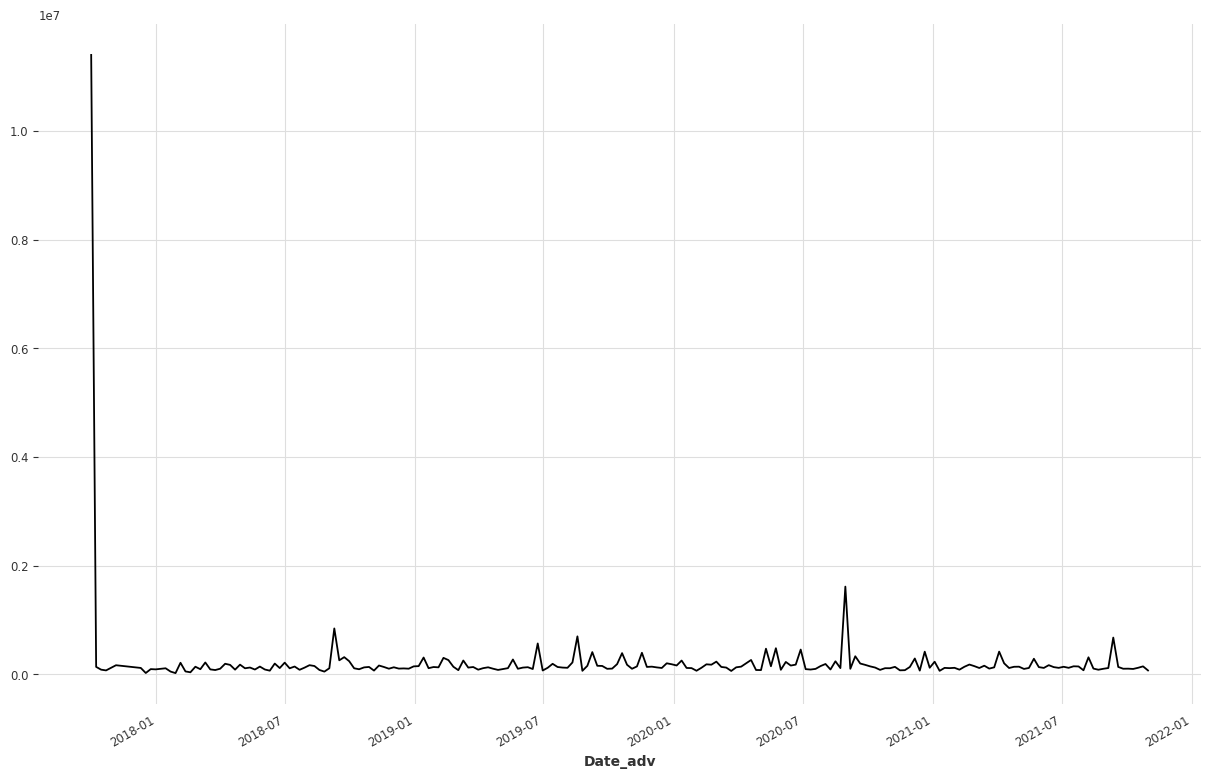

In [ ]:
df_dropna['Prezzo asta (Euro)'].plot()

Big outlier, vendita hotel che può inficiare la serie, rimuovo la prima settimana

In [ ]:
df_clean = df_weekly_mean.copy()
df_clean = df_clean.interpolate(method = 'linear')
df_clean.isna().sum()

Prezzo asta (Euro)         0
Attesa vendita (giorni)    0
dtype: int64

In [ ]:
df_sorted = df_clean.sort_values(by='Prezzo asta (Euro)', ascending=False)
df_sorted

,Prezzo asta (Euro),Attesa vendita (giorni)
Date_adv,,
2017-10-01,1.140235e+07,61.000000
2020-08-30,1.616892e+06,73.277778
2018-09-09,8.473839e+05,59.185185
2019-08-18,7.015953e+05,75.333333
2021-09-12,6.792375e+05,60.500000
...,...,...
2018-01-21,5.339355e+04,56.000000
2018-08-26,5.278151e+04,63.285714
2018-02-18,4.016250e+04,47.000000


<Axes: xlabel='Date_adv'>

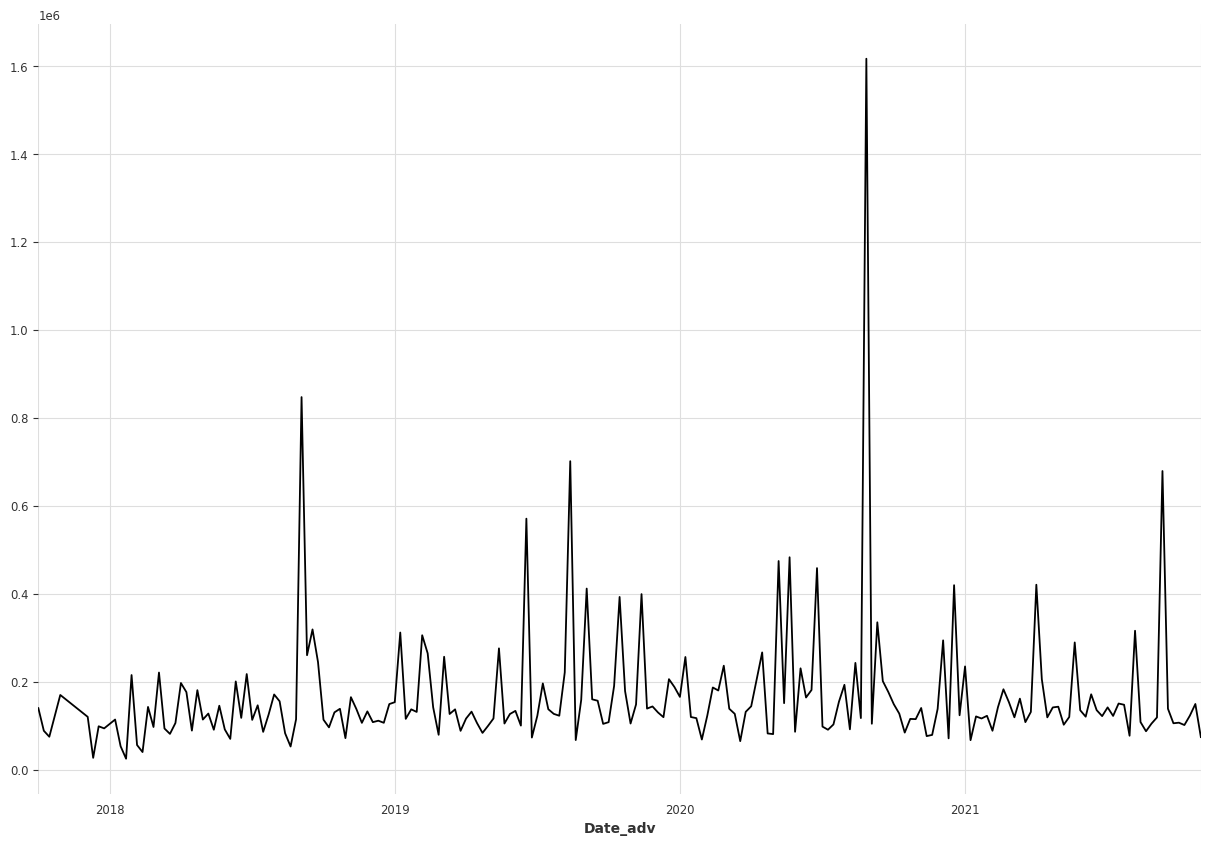

In [ ]:
df_clean =  df_clean.iloc[1:]
df_clean['Prezzo asta (Euro)'].plot()

<Axes: xlabel='Date_adv'>

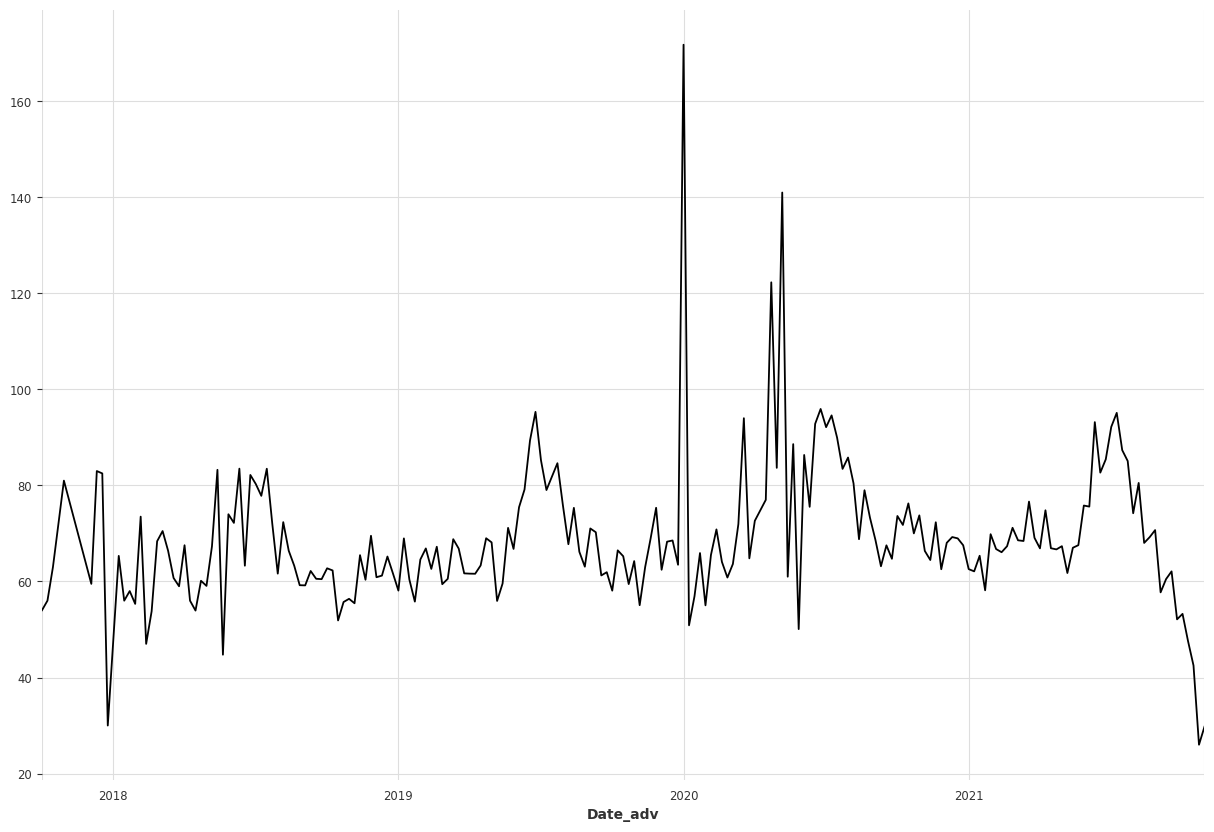

In [ ]:
df_clean['Attesa vendita (giorni)'].plot()

In [ ]:
mask = (df_clean < 0).any(axis=1)
negative_rows = df_clean[mask]

# Print the negative rows
print(negative_rows)

Empty DataFrame
Columns: [Prezzo asta (Euro), Attesa vendita (giorni)]
Index: []


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2017-10-08 to 2021-10-31
Freq: W-SUN
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Prezzo asta (Euro)       213 non-null    float64
 1   Attesa vendita (giorni)  213 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# load the data into a pandas DataFrame
data = df_clean.copy()

# define the input features and target variable
X_train = data.drop('Attesa vendita (giorni)', axis=1)
y_train = data['Attesa vendita (giorni)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# create the random forest regressor model
model = RandomForestRegressor()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)


MSE: 257.9601001482395
MAE: 11.959379673424575


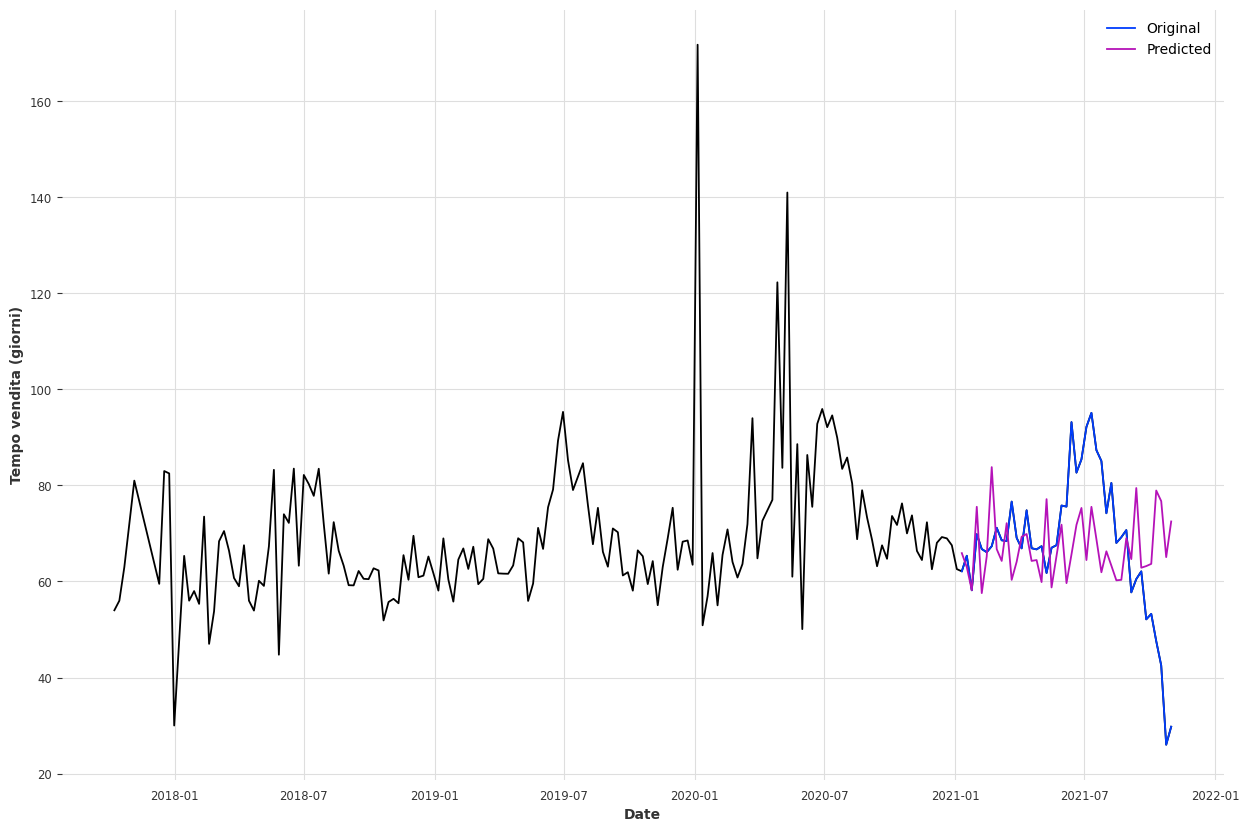

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['Attesa vendita (giorni)'].index, data['Attesa vendita (giorni)'].values)
plt.plot(y_test.index, y_test.values, label='Original')
plt.plot(y_test.index, y_pred, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Tempo vendita (giorni)')
plt.legend()

plt.show()

In [ ]:
data

,Prezzo asta (Euro),Attesa vendita (giorni)
Date_adv,,
2017-10-08,140000.000000,54.000000
2017-10-15,88576.000000,56.000000
2017-10-22,75000.000000,63.000000
2017-10-29,122500.000000,72.000000
2017-11-05,170000.000000,81.000000
...,...,...
2021-10-03,106935.615625,53.250000
2021-10-10,101607.147500,47.583333
2021-10-17,123000.000000,42.500000


In [ ]:
co = data.copy()
co.reset_index(inplace = True)
co

,Date_adv,Prezzo asta (Euro),Attesa vendita (giorni)
0,2017-10-08,140000.000000,54.000000
1,2017-10-15,88576.000000,56.000000
2,2017-10-22,75000.000000,63.000000
3,2017-10-29,122500.000000,72.000000
4,2017-11-05,170000.000000,81.000000
...,...,...,...
208,2021-10-03,106935.615625,53.250000
209,2021-10-10,101607.147500,47.583333
210,2021-10-17,123000.000000,42.500000
211,2021-10-24,149472.000000,26.000000


Text(0.5, 1.0, "Media settimanale del tempo di vendita dalla pubblicazione dell'annuncio (giorni)")

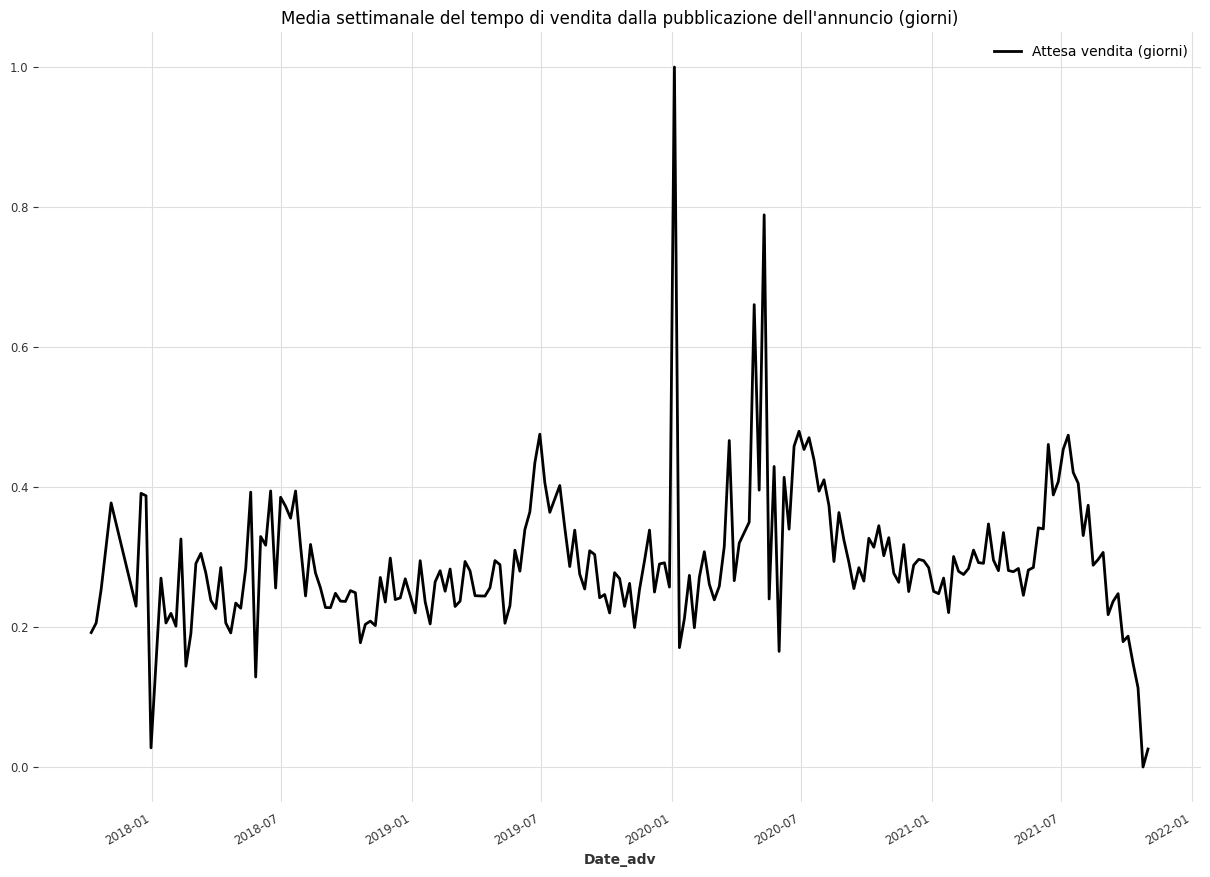

In [ ]:
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            co, "Date_adv", ["Attesa vendita (giorni)"],
            fill_missing_dates=True
        )
    )
).astype(np.float32)
series.plot()
plt.title("Media settimanale del tempo di vendita dalla pubblicazione dell'annuncio (giorni)")

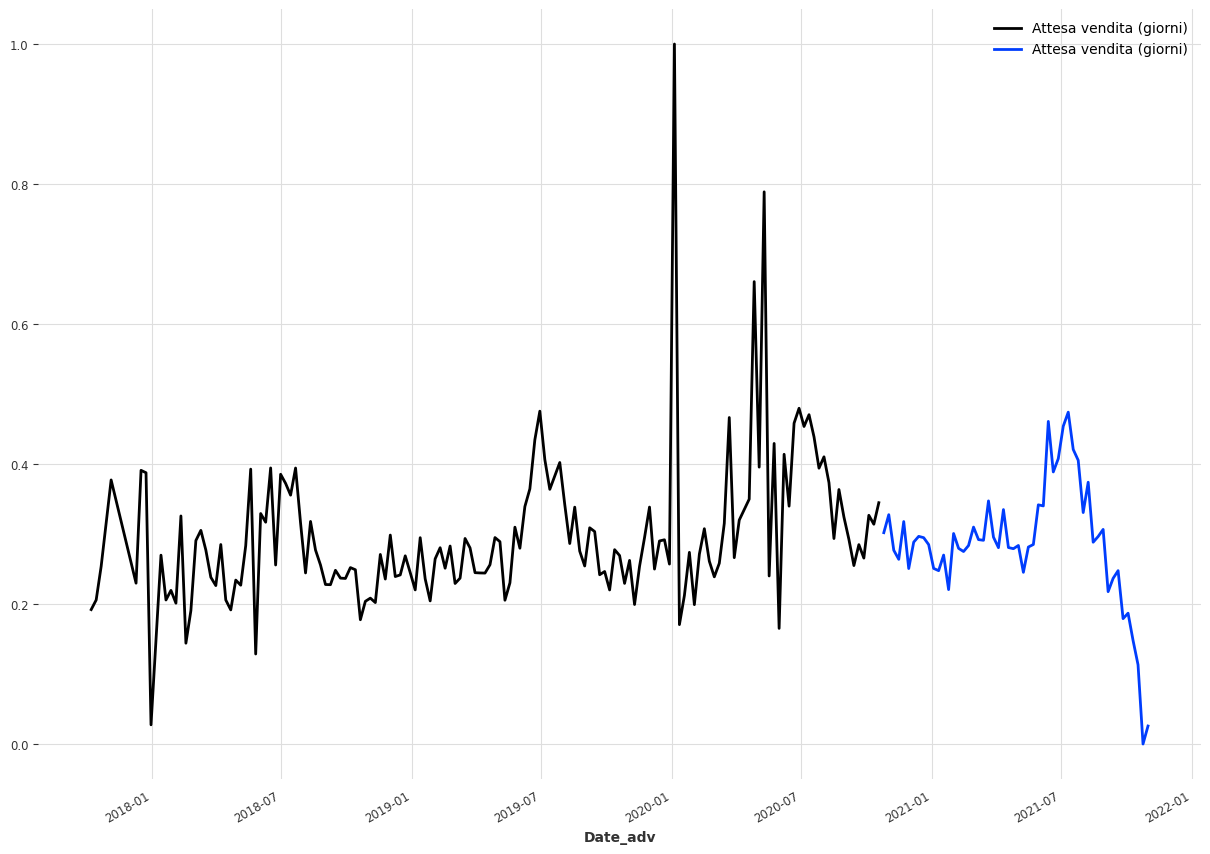

In [ ]:
train, val = series.split_before(0.75)
train.plot()
val.plot()

100%|██████████| 84/84 [00:11<00:00,  7.05it/s]


MAPE = 21.25%
MAE: 0.07201545818223799
RMSE: 0.1083226879475592


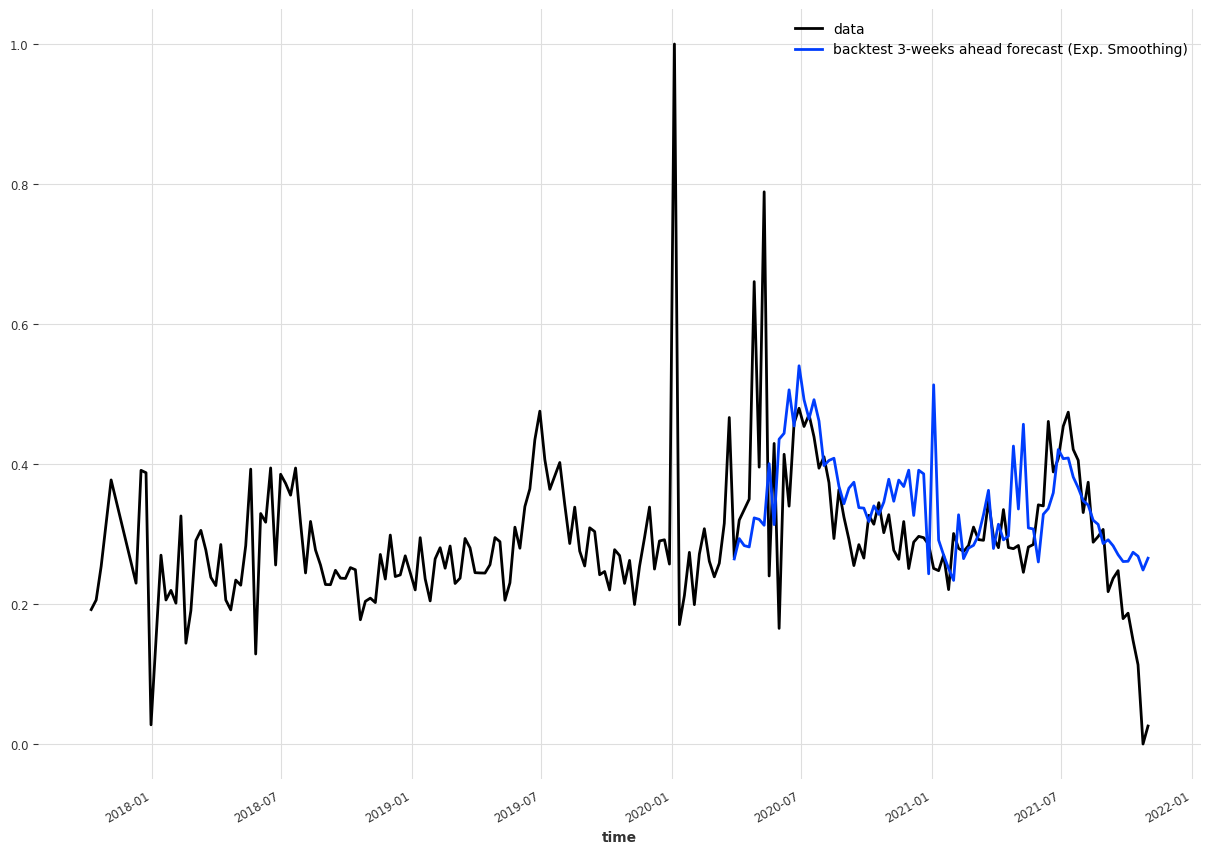

In [ ]:
model_es = ExponentialSmoothing()
historical_fcast_es = model_es.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

series.plot(label="data")
historical_fcast_es.plot(label="backtest 3-weeks ahead forecast (Exp. Smoothing)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_es, series)))
print("MAE: {}".format(mae(historical_fcast_es, series)))
print("RMSE: {}".format(rmse(historical_fcast_es, series)))